In [78]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar

In [2]:
client = bigquery.Client()
q = "SELECT * FROM `mlops-zoomcamp-354700.energy_data_prod.joined_temp_and_demand`"
df_raw = pd.read_gbq(q, project_id='mlops-zoomcamp-354700')
df_raw.head()

,temp_timestamp_mtn,energy_timestamp_mtn,energy_demand,demand_units,series_name,temp_F,temp_C,temp_location_lat,temp_location_lon,temp_source,date_energy_updated
0,2015-07-02 05:51:00,2015-07-02 05:00:00,4192.0,megawatthours,Demand for Public Service Company of Colorado ...,57.2,14.0,39.847,-104.656,isd,2022-06-17T07:48:44-0400
1,2015-07-02 07:51:00,2015-07-02 07:00:00,4679.0,megawatthours,Demand for Public Service Company of Colorado ...,57.2,14.0,39.847,-104.656,isd,2022-06-17T07:48:44-0400
2,2015-07-04 12:53:00,2015-07-04 12:00:00,5773.0,megawatthours,Demand for Public Service Company of Colorado ...,91.9,33.3,39.847,-104.656,isd,2022-06-17T07:48:44-0400
3,2015-07-04 13:53:00,2015-07-04 13:00:00,6130.0,megawatthours,Demand for Public Service Company of Colorado ...,93.0,33.9,39.847,-104.656,isd,2022-06-17T07:48:44-0400
4,2015-07-04 14:53:00,2015-07-04 14:00:00,6382.0,megawatthours,Demand for Public Service Company of Colorado ...,93.0,33.9,39.847,-104.656,isd,2022-06-17T07:48:44-0400


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93102 entries, 0 to 93101
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   temp_timestamp_mtn    93037 non-null  datetime64[ns]
 1   energy_timestamp_mtn  93102 non-null  datetime64[ns]
 2   energy_demand         93042 non-null  float64       
 3   demand_units          93102 non-null  object        
 4   series_name           93102 non-null  object        
 5   temp_F                93037 non-null  float64       
 6   temp_C                93037 non-null  float64       
 7   temp_location_lat     93037 non-null  float64       
 8   temp_location_lon     93037 non-null  float64       
 9   temp_source           93037 non-null  object        
 10  date_energy_updated   93102 non-null  object        
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 7.8+ MB


In [81]:
df_raw.describe()

,energy_demand,temp_F,temp_C,temp_location_lat,temp_location_lon
count,93042.000000,93037.000000,93037.000000,9.303700e+04,9.303700e+04
mean,5244.473829,50.216370,10.120314,3.984700e+01,-1.046560e+02
std,976.789941,20.841924,11.578714,2.131640e-14,4.263279e-14
min,0.000000,-16.100000,-26.700000,3.984700e+01,-1.046560e+02
25%,4610.000000,34.000000,1.100000,3.984700e+01,-1.046560e+02
50%,5110.000000,50.000000,10.000000,3.984700e+01,-1.046560e+02
75%,5722.000000,66.000000,18.900000,3.984700e+01,-1.046560e+02
max,60576.000000,102.000000,38.900000,3.984700e+01,-1.046560e+02


In [91]:
df_raw.isna().sum()

temp_timestamp_mtn      65
energy_timestamp_mtn     0
energy_demand           60
demand_units             0
series_name              0
temp_F                  65
temp_C                  65
temp_location_lat       65
temp_location_lon       65
temp_source             65
date_energy_updated      0
dtype: int64

In [87]:
df_raw[df_raw['energy_demand'].isna()]

,temp_timestamp_mtn,energy_timestamp_mtn,energy_demand,demand_units,series_name,temp_F,temp_C,temp_location_lat,temp_location_lon,temp_source,date_energy_updated
3207,2018-06-14 10:53:00,2018-06-14 10:00:00,NaN,megawatthours,Demand for Public Service Company of Colorado ...,90.0,32.2,39.847,-104.656,isd,2022-06-17T07:48:44-0400
3208,2018-06-14 11:53:00,2018-06-14 11:00:00,NaN,megawatthours,Demand for Public Service Company of Colorado ...,93.0,33.9,39.847,-104.656,isd,2022-06-17T07:48:44-0400
3209,2018-06-14 12:00:00,2018-06-14 12:00:00,NaN,megawatthours,Demand for Public Service Company of Colorado ...,93.0,33.9,39.847,-104.656,isd,2022-06-17T07:48:44-0400
3210,2018-06-14 12:53:00,2018-06-14 12:00:00,NaN,megawatthours,Demand for Public Service Company of Colorado ...,96.1,35.6,39.847,-104.656,isd,2022-06-17T07:48:44-0400
3211,2018-06-14 13:53:00,2018-06-14 13:00:00,NaN,megawatthours,Demand for Public Service Company of Colorado ...,93.9,34.4,39.847,-104.656,isd,2022-06-17T07:48:44-0400
3212,2018-06-14 14:53:00,2018-06-14 14:00:00,NaN,megawatthours,Demand for Public Service Company of Colorado ...,96.1,35.6,39.847,-104.656,isd,2022-06-17T07:48:44-0400
3213,2018-06-14 15:53:00,2018-06-14 15:00:00,NaN,megawatthours,Demand for Public Service Company of Colorado ...,93.0,33.9,39.847,-104.656,isd,2022-06-17T07:48:44-0400
3214,2018-06-14 15:00:00,2018-06-14 15:00:00,NaN,megawatthours,Demand for Public Service Company of Colorado ...,96.1,35.6,39.847,-104.656,isd,2022-06-17T07:48:44-0400
3215,2018-06-14 16:53:00,2018-06-14 16:00:00,NaN,megawatthours,Demand for Public Service Company of Colorado ...,90.0,32.2,39.847,-104.656,isd,2022-06-17T07:48:44-0400
3216,2018-06-14 16:27:00,2018-06-14 16:00:00,NaN,megawatthours,Demand for Public Service Company of Colorado ...,91.0,32.8,39.847,-104.656,isd,2022-06-17T07:48:44-0400


In [92]:
df_raw.dropna(subset=['energy_demand', 'temp_F']).isna().sum()

temp_timestamp_mtn      0
energy_timestamp_mtn    0
energy_demand           0
demand_units            0
series_name             0
temp_F                  0
temp_C                  0
temp_location_lat       0
temp_location_lon       0
temp_source             0
date_energy_updated     0
dtype: int64

<AxesSubplot:xlabel='energy_timestamp_mtn'>

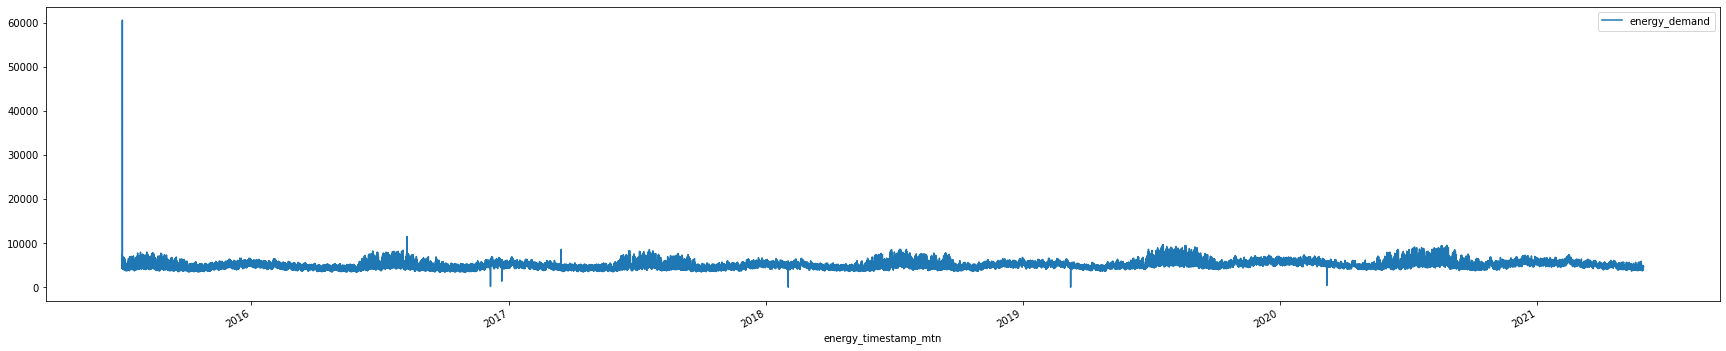

In [8]:
df_train_raw = df_raw[df_raw['energy_timestamp_mtn'] < pd.to_datetime('2021-06-01')]
df_train_raw.plot(x='energy_timestamp_mtn', y='energy_demand', figsize=(30, 6))

<AxesSubplot:xlabel='energy_timestamp_mtn'>

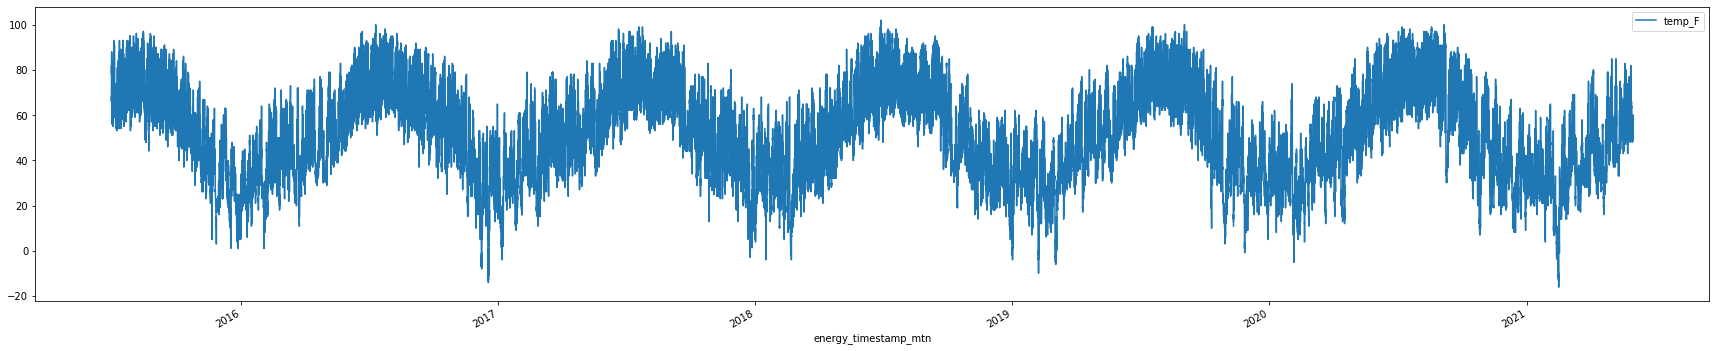

In [10]:
df_train_raw = df_raw[df_raw['energy_timestamp_mtn'] < pd.to_datetime('2021-06-01')]
df_train_raw.plot(x='energy_timestamp_mtn', y='temp_F', figsize=(30, 6))

<AxesSubplot:xlabel='energy_timestamp_mtn'>

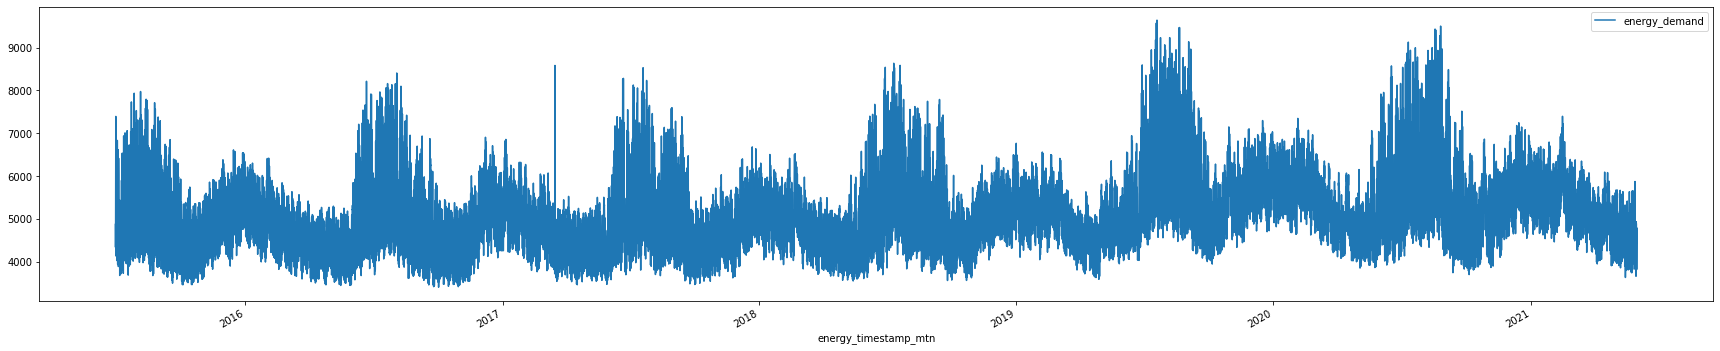

In [13]:
def clean_data(df, min_val, max_val):
    return df[df['energy_demand'].between(min_val, max_val)].set_index('energy_timestamp_mtn')
              
df_trim = clean_data(df_train_raw, 2000, 11_000)
df_trim.reset_index().plot(x='energy_timestamp_mtn', y='energy_demand', figsize=(30, 6))

(2015.0, 2020.0)

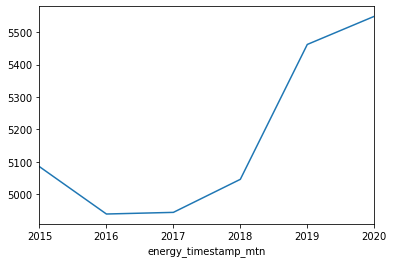

In [15]:
ax = df_trim.groupby(df_trim.index.year)['energy_demand'].mean().plot()
ax.set_xlim(2015, 2020)

<AxesSubplot:xlabel='energy_timestamp_mtn'>

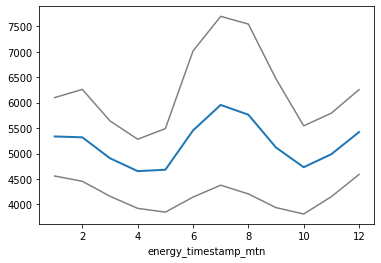

In [16]:
ax = df_trim.groupby(df_trim.index.month)['energy_demand'].mean().plot(linewidth=2)
df_trim.groupby(df_trim.index.month)['energy_demand'].quantile(.1).plot(c='gray')
df_trim.groupby(df_trim.index.month)['energy_demand'].quantile(.9).plot(c='gray')




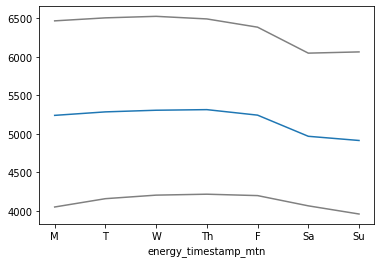

In [17]:
ax = df_trim.groupby(df_trim.index.dayofweek)['energy_demand'].mean().plot()
df_trim.groupby(df_trim.index.dayofweek)['energy_demand'].quantile(.1).plot(c='gray')
df_trim.groupby(df_trim.index.dayofweek)['energy_demand'].quantile(.9).plot(c='gray')
ax.set_xticks(range(0,7))
ax.set_xticklabels(['M', 'T', 'W', 'Th', 'F', 'Sa', 'Su']);

<AxesSubplot:xlabel='energy_timestamp_mtn'>

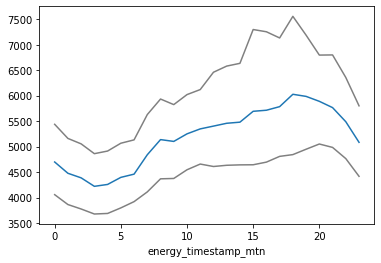

In [19]:
ax = df_trim.groupby(df_trim.index.hour)['energy_demand'].mean().plot()
df_trim.groupby(df_trim.index.hour)['energy_demand'].quantile(.1).plot(c='gray')
df_trim.groupby(df_trim.index.hour)['energy_demand'].quantile(.9).plot(c='gray')

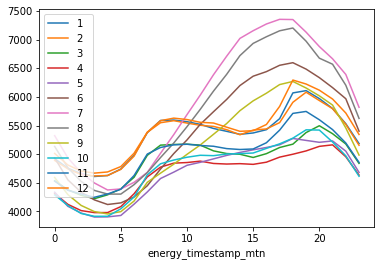

In [29]:
hourly_avg_by_month = df_trim.groupby([df_trim.index.month, df_trim.index.hour])['energy_demand'].mean()
for month in range(1,13):
    hourly_avg_by_month.loc[month].plot(label=month, legend=True)

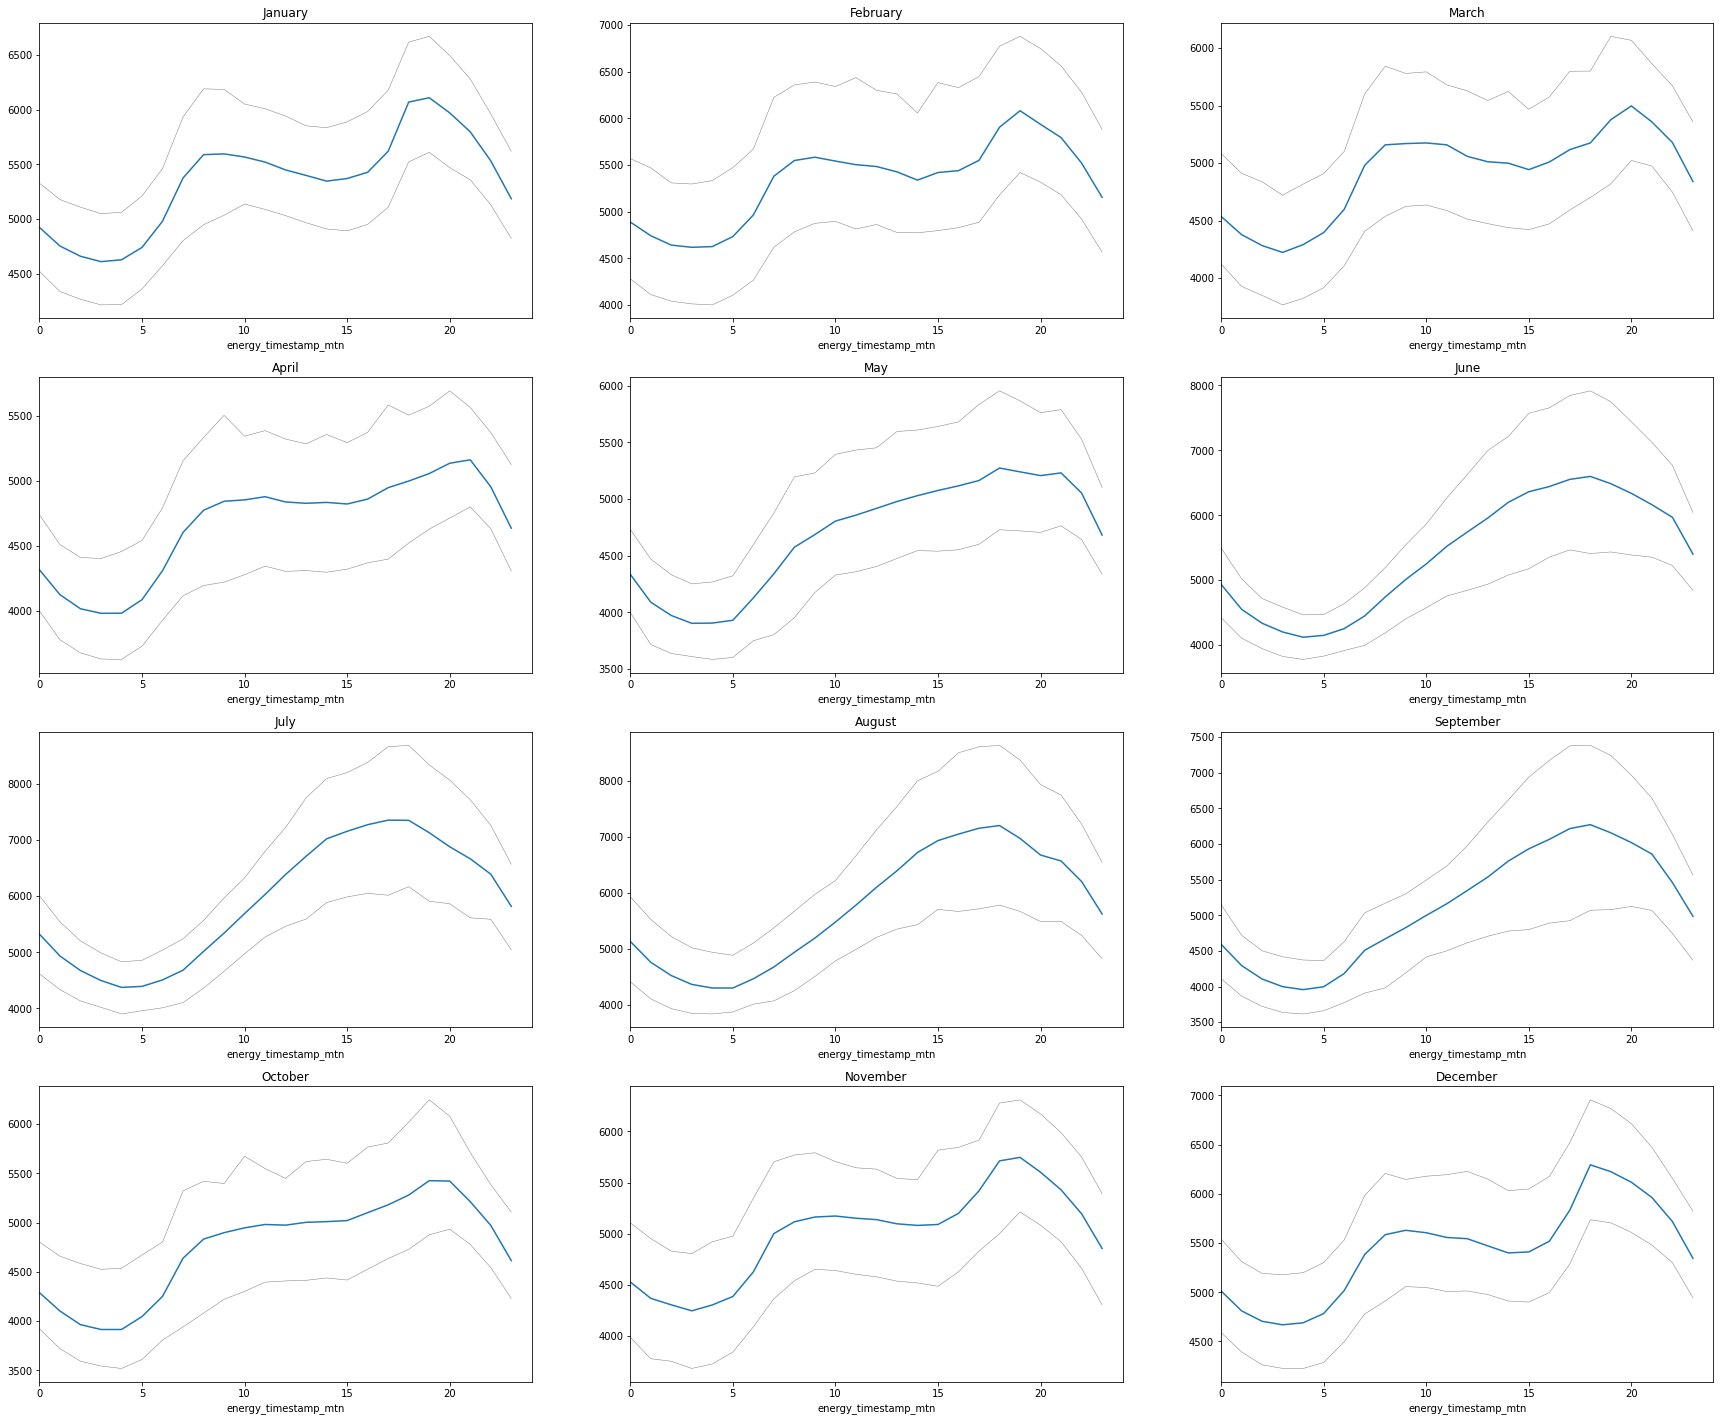

In [80]:
hourly_avg_by_month = df_trim.groupby([df_trim.index.month, df_trim.index.hour])['energy_demand'].mean()
hourly_p10_by_month = df_trim.groupby([df_trim.index.month, df_trim.index.hour])['energy_demand'].quantile(.9)
hourly_p90_by_month = df_trim.groupby([df_trim.index.month, df_trim.index.hour])['energy_demand'].quantile(.1)


fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(30, 25))
for axis, month, month_name in zip(ax.flatten(), range(1,13), calendar.month_name[1:]):
    hourly_avg_by_month.loc[month].plot(ax=axis)
    hourly_p10_by_month.loc[month].plot(legend=False, ax=axis, color='gray', linewidth=.5)
    hourly_p90_by_month.loc[month].plot(legend=False, ax=axis, color='gray', linewidth=.5)

    axis.set(xlim=(0,24), title=month_name)

<AxesSubplot:xlabel='temp_F', ylabel='energy_demand'>

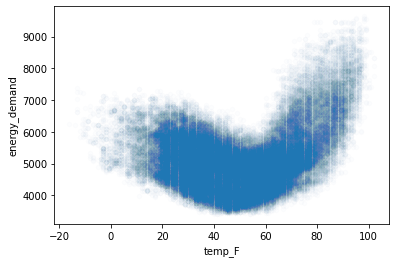

In [59]:
df_trim.plot.scatter(x='temp_F', y='energy_demand', alpha=.01)

<AxesSubplot:xlabel='temp_F'>

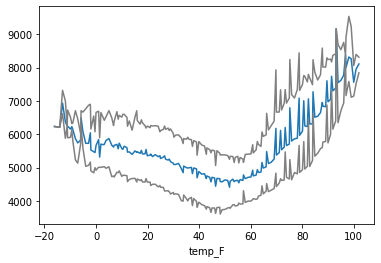

In [32]:
ax = df_trim.groupby('temp_F')['energy_demand'].mean().plot()
df_trim.groupby('temp_F')['energy_demand'].quantile(.1).plot(c='gray')
df_trim.groupby('temp_F')['energy_demand'].quantile(.9).plot(c='gray')

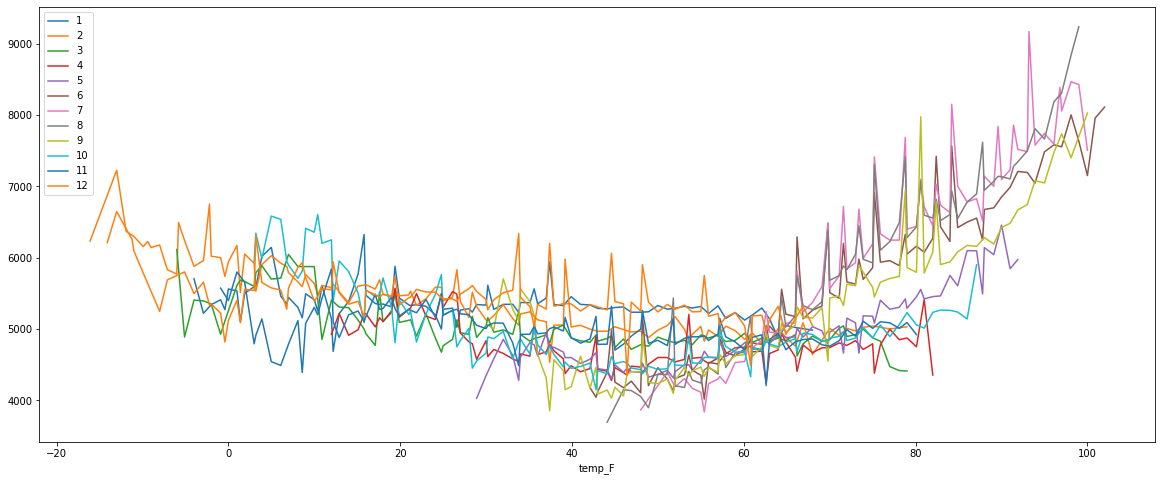

In [55]:
avg_demand_by_month_and_temp.loc[month].plot(label=month, legend=True, ax=axis)
fig, ax = plt.subplots(figsize=(20, 8))
for month in range(1,13):
    avg_demand_by_month_and_temp.loc[month].plot(label=month, legend=True)

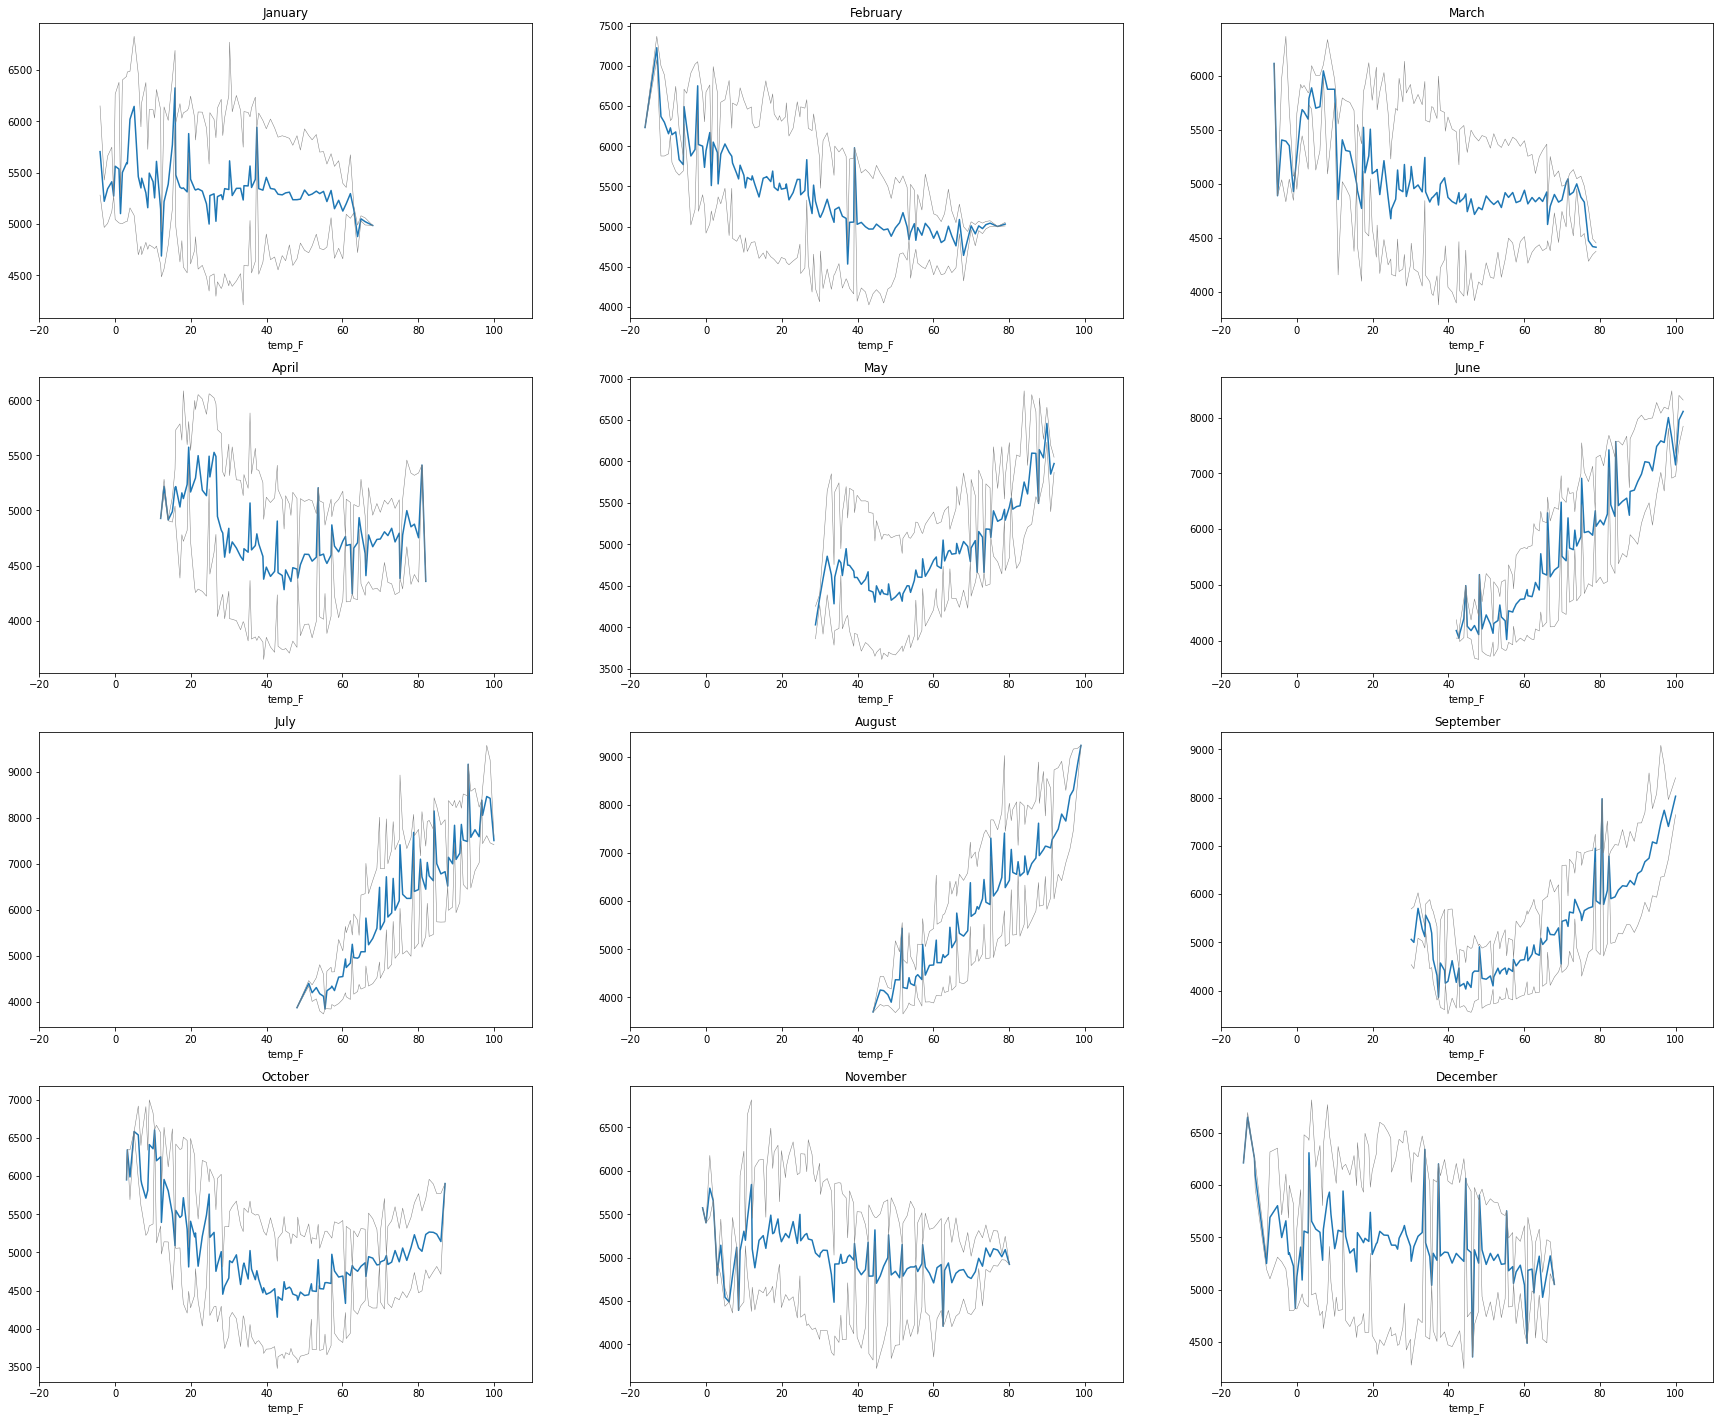

In [77]:
avg_demand_by_month_and_temp = df_trim.groupby([df_trim.index.month, 'temp_F'])['energy_demand'].mean()
p10_demand_by_month_and_temp = df_trim.groupby([df_trim.index.month, 'temp_F'])['energy_demand'].quantile(.9)
p90_demand_by_month_and_temp = df_trim.groupby([df_trim.index.month, 'temp_F'])['energy_demand'].quantile(.1)


fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(30, 25))
for axis, month, month_name in zip(ax.flatten(), range(1,13), calendar.month_name[1:]):
    avg_demand_by_month_and_temp.loc[month].plot(ax=axis)
    p10_demand_by_month_and_temp.loc[month].plot(legend=False, ax=axis, color='gray', linewidth=.5)
    p90_demand_by_month_and_temp.loc[month].plot(legend=False, ax=axis, color='gray', linewidth=.5)

    axis.set(xlim=(-20, 110), title=month_name)

0 January
1 February
2 March
3 April
4 May
5 June
6 July
7 August
8 September
9 October
10 November
11 December
